$\textbf{Student:}$ Carlos Daniel Fontes da Silva\
$\textbf{E-mail:}$ carlos.fontes@ee.ufcg.edu.br

# Rectangular metal waveguide

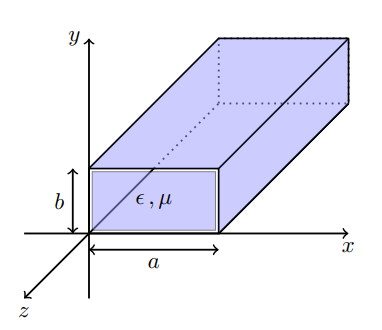

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from scipy.constants import c, pi, mu_0, epsilon_0
from numpy.lib.scimath import sqrt as csqrt

In [12]:
f = 1e9*np.linspace(1, 60, 1000)   # Frequency range
k = 2*pi*f/c                       # Wave number
F = 20e9                           # Operation frequency

# Guide geometry
a = 2.5e-2                         # width in x
b = 1.25e-2                        # height in y

# Dielectric settings
σd = 0                             # Conductivity
ε = 1 * epsilon_0                  # Permittivity
μ = 1 * mu_0                       # Permeability
η = np.sqrt(μ/ε)                   # Intrinsic impedance

# Conductor settings
σc = 58e6                          # Conductivity (Cu)
Rs = np.sqrt(pi*μ*f/σc)            # Superficial resistance

## 1 - TE modes

### 1.1 - Propagated modes

In [13]:
def propagation_TE(F):
    modes = list(itertools.product([0,1,2,3], [0,1,2,3]))[1:]
    fc = np.zeros(len(modes))
    prop = np.zeros((len(modes), 3))
    
    for i in range(len(modes)):
        m, n = modes[i]
        kc = np.sqrt((m*pi/a)**2 + (n*pi/b)**2)
        fc[i] = c*kc/(2*pi)

        if(F > fc[i]):
            prop[i,:] = np.array([m, n, fc[i]])
                
    prop = prop[~np.all(prop == 0, axis=1)]
    prop = prop[prop[:, 2].argsort()]
    
    return prop

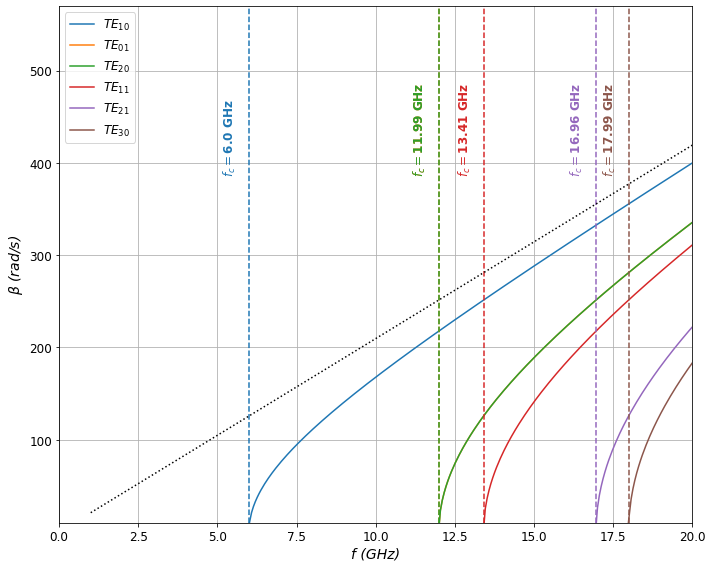

In [14]:
plt.figure(figsize = (10,8))

prop = propagation_TE(F)

for i in range(len(prop)):
    m, n = prop[i,0:2]
    fc = prop[i,2]
    
    kc = 2*pi*fc/c
    β = np.real(csqrt(k**2 - kc**2))
    
    p = plt.plot(f*1e-9, β, label = r'$TE_{'+str(int(m))+str(int(n))+'}$')
    plt.text(1e-9*fc-0.6, k[np.where(f > F)[0][0]] - 30, r'$f_c = $'+str(round(1e-9*fc,2))+' GHz',fontsize = 12, color = p[-1].get_color(),fontweight = 'bold',ha = 'center', rotation = 90) 
    plt.axvline(1e-9*fc, ls = '--', color = p[-1].get_color())
        
plt.plot(1e-9*f, k, ls = ':', color = 'k')
plt.ylabel(r'$\beta$ (rad/s)', fontsize = 14, fontstyle = 'italic')
plt.xlabel('f (GHz)', fontsize = 14, fontstyle = 'italic')
plt.xlim(0, F*1e-9)
plt.ylim(10, k[np.where(f > F)[0][0]] + 150)
plt.tick_params(axis = 'both', labelsize = 12)
plt.legend(fontsize = 12)
plt.grid()
plt.tight_layout()

### 1.2 - Losses by the conductor

<ipython-input-15-e3325fb90ac0>:15: RuntimeWarning: divide by zero encountered in true_divide
  αc = (Rs/(η*b)) * (1 + 2*(b/a) * (fc/f)**2) * k / β
<ipython-input-15-e3325fb90ac0>:13: RuntimeWarning: divide by zero encountered in true_divide
  αc = (Rs/(η*a)) * (1 + 2*(a/b) * (fc/f)**2) * k / β
<ipython-input-15-e3325fb90ac0>:15: RuntimeWarning: divide by zero encountered in true_divide
  αc = (Rs/(η*b)) * (1 + 2*(b/a) * (fc/f)**2) * k / β
<ipython-input-15-e3325fb90ac0>:11: RuntimeWarning: divide by zero encountered in true_divide
  αc = 2*Rs/(b*η*β/k) * (   (1 + b/a)*(fc/f)**2  + (1 - (fc/f)**2)*(b/a)*((b/a)*m**2 + n**2) / ((b/a)**2*m**2 + n**2) )
<ipython-input-15-e3325fb90ac0>:11: RuntimeWarning: divide by zero encountered in true_divide
  αc = 2*Rs/(b*η*β/k) * (   (1 + b/a)*(fc/f)**2  + (1 - (fc/f)**2)*(b/a)*((b/a)*m**2 + n**2) / ((b/a)**2*m**2 + n**2) )
<ipython-input-15-e3325fb90ac0>:15: RuntimeWarning: divide by zero encountered in true_divide
  αc = (Rs/(η*b)) * (1 + 2*(b/a) *

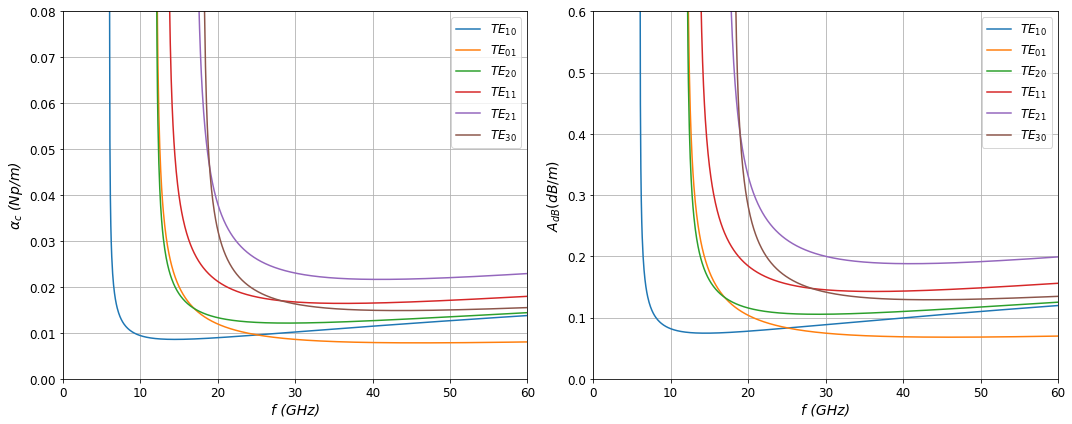

In [15]:
fig, axs = plt.subplots(1, 2, figsize = (15,6))

for i in range(len(prop)):
    m, n = prop[i,0:2]
    fc = prop[i,2]
    
    kc = 2*pi*fc/c
    β = np.real(csqrt(k**2 - kc**2))
    
    if(m != 0 and n != 0):
        αc = 2*Rs/(b*η*β/k) * (   (1 + b/a)*(fc/f)**2  + (1 - (fc/f)**2)*(b/a)*((b/a)*m**2 + n**2) / ((b/a)**2*m**2 + n**2) )
    elif(m == 0):
        αc = (Rs/(η*a)) * (1 + 2*(a/b) * (fc/f)**2) * k / β
    else:
        αc = (Rs/(η*b)) * (1 + 2*(b/a) * (fc/f)**2) * k / β
    
    A_dB = 20*np.log10(np.exp(αc))
    
    axs[0].plot(f*1e-9, αc, label = r'$TE_{'+str(int(m))+str(int(n))+'}$')
    axs[1].plot(f*1e-9, A_dB, label = r'$TE_{'+str(int(m))+str(int(n))+'}$')
        
axs[0].set_ylabel(r'$α_c$ (Np/m)', fontsize = 14, fontstyle = 'italic')
axs[0].set_xlabel('f (GHz)', fontsize = 14, fontstyle = 'italic')
axs[0].set_xlim(0, max(1e-9*f))
axs[0].set_ylim(0, 0.08)
axs[0].tick_params(axis = 'both', labelsize = 12)
axs[0].legend(fontsize = 12)
axs[0].grid()

axs[1].set_ylabel(r'$A_{dB} (dB/m)$', fontsize = 14, fontstyle = 'italic')
axs[1].set_xlabel('f (GHz)', fontsize = 14, fontstyle = 'italic')
axs[1].set_xlim(0, max(1e-9*f))
axs[1].set_ylim(0, 0.6)
axs[1].tick_params(axis = 'both', labelsize = 12)
axs[1].legend(fontsize = 12)
axs[1].grid()

plt.tight_layout()

### 1.3 - Field profiles

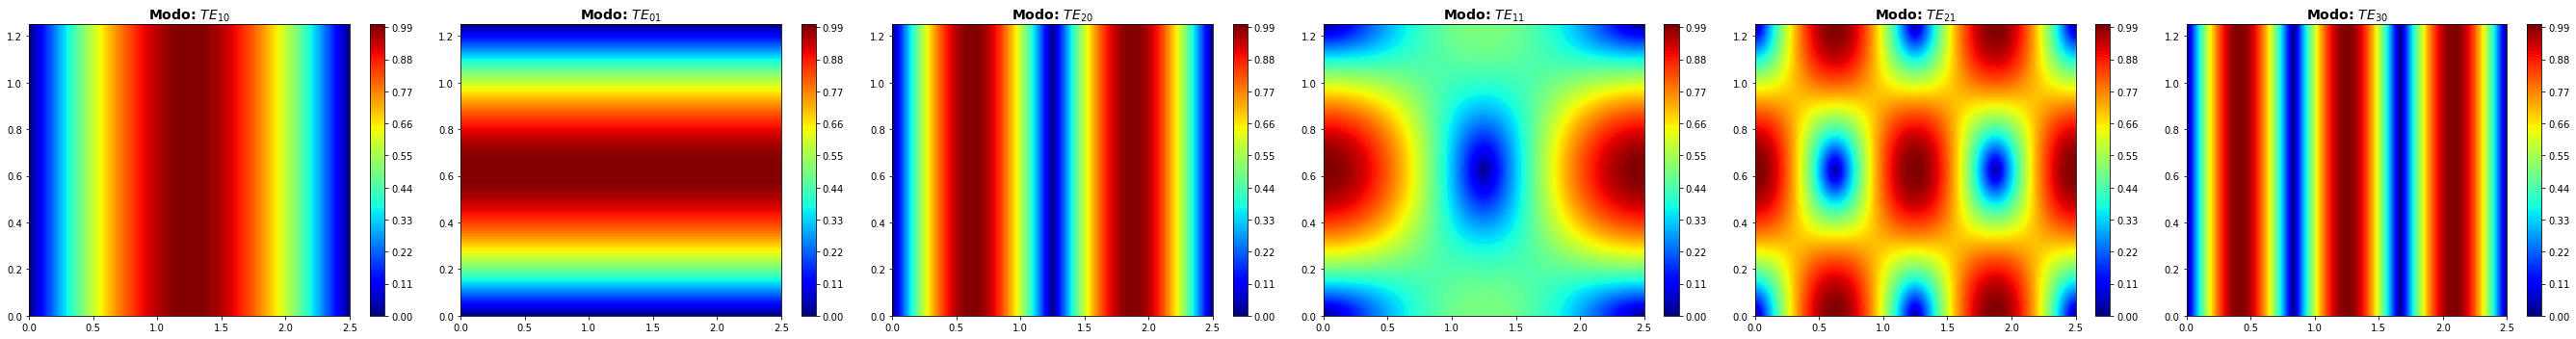

In [16]:
fig, axs = plt.subplots(1, len(prop), figsize = (6.25*len(prop), 5))
mycmap = plt.get_cmap('jet')

x = np.linspace(0, a, 100)
y = np.linspace(0, b, 100)
z = 0.1
X, Y = np.meshgrid(x, y)

for i in range(len(prop)):
    m, n = prop[i,0:2]
    fc = prop[i,2]
    
    kx = m*pi/a
    ky = n*pi/b
    kc = 2*pi*fc/c
    K = 2*pi*F/c
    β = csqrt(K**2 - kc**2)
    
    Ex = (1j*2*pi*F*μ*ky/kc**2)*np.cos(kx*X)*np.sin(ky*Y)*np.exp(1j*β*z)
    Ey = (-1j*2*pi*F*μ*kx/kc**2)*np.sin(kx*X)*np.cos(ky*Y)*np.exp(1j*β*z)
    Ez = 0
    
    E = np.sqrt(abs(Ex)**2 + abs(Ey)**2 + abs(Ez)**2)
    Emax = np.max(E)
    
    field = axs[i].contourf(X*1e2, Y*1e2, E/Emax, 100, cmap = mycmap, vmin = 0, vmax = 1)
    fig.colorbar(field, ax = axs[i])
    axs[i].set_title('Modo: $TE_{'+str(int(m))+str(int(n))+'}$', fontsize = 14, fontweight = 'bold')
    
plt.tight_layout()

## 2 - TM modes

### 2.1 - Propagated modes

In [17]:
def propagation_TM(F):
    modes = list(itertools.product([1,2,3], [1,2,3]))
    fc = np.zeros(len(modes))
    prop = np.zeros((len(modes), 3))
    
    for i in range(len(modes)):
        m, n = modes[i]
        kc = np.sqrt((m*pi/a)**2 + (n*pi/b)**2)
        fc[i] = c*kc/(2*pi)

        if(F > fc[i]):
            prop[i,:] = np.array([m, n, fc[i]])
                
    prop = prop[~np.all(prop == 0, axis=1)]
    prop = prop[prop[:, 2].argsort()]
    
    return prop

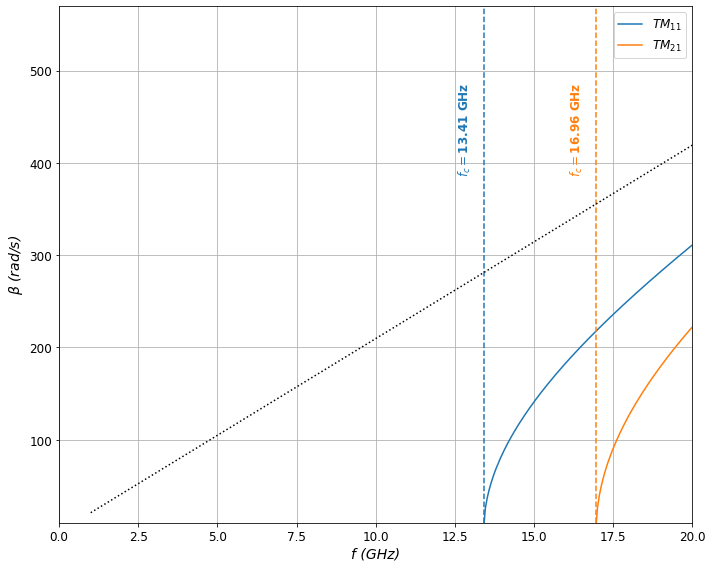

In [18]:
plt.figure(figsize = (10,8))

prop = propagation_TM(F)

for i in range(len(prop)):
    m, n = prop[i,0:2]
    fc = prop[i,2]
    
    kc = 2*pi*fc/c
    β = np.real(csqrt(k**2 - kc**2))
    
    p = plt.plot(f*1e-9, β, label = r'$TM_{'+str(int(m))+str(int(n))+'}$')
    plt.text(1e-9*fc-0.6, k[np.where(f > F)[0][0]] - 30, r'$f_c = $'+str(round(1e-9*fc,2))+' GHz',fontsize = 12, color = p[-1].get_color(),fontweight = 'bold',ha = 'center', rotation = 90) 
    plt.axvline(1e-9*fc, ls = '--', color = p[-1].get_color())
        
plt.plot(1e-9*f, k, ls = ':', color = 'k')
plt.ylabel(r'$\beta$ (rad/s)', fontsize = 14, fontstyle = 'italic')
plt.xlabel('f (GHz)', fontsize = 14, fontstyle = 'italic')
plt.xlim(0, F*1e-9)
plt.ylim(10, k[np.where(f > F)[0][0]] + 150)
plt.tick_params(axis = 'both', labelsize = 12)
plt.legend(fontsize = 12)
plt.grid()
plt.tight_layout()

### 2.2 - Losses by the conductor

<ipython-input-19-43af36d2c9cc>:10: RuntimeWarning: divide by zero encountered in true_divide
  αc = (2*Rs/(b*η*β/k)) * ((m**2*(b/a)**3 + n**2)  /  (m**2*(b/a)**2 + n**2))
<ipython-input-19-43af36d2c9cc>:10: RuntimeWarning: divide by zero encountered in true_divide
  αc = (2*Rs/(b*η*β/k)) * ((m**2*(b/a)**3 + n**2)  /  (m**2*(b/a)**2 + n**2))


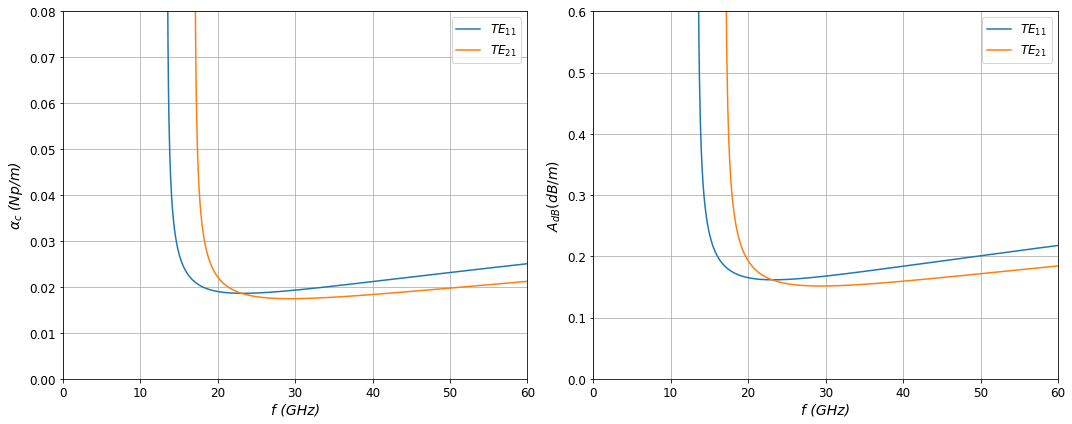

In [19]:
fig, axs = plt.subplots(1, 2, figsize = (15,6))

for i in range(len(prop)):
    m, n = prop[i,0:2]
    fc = prop[i,2]
    
    kc = 2*pi*fc/c
    β = np.real(csqrt(k**2 - kc**2))
    
    αc = (2*Rs/(b*η*β/k)) * ((m**2*(b/a)**3 + n**2)  /  (m**2*(b/a)**2 + n**2))

    A_dB = 20*np.log10(np.exp(αc))
    
    axs[0].plot(f*1e-9, αc, label = r'$TE_{'+str(int(m))+str(int(n))+'}$')
    axs[1].plot(f*1e-9, A_dB, label = r'$TE_{'+str(int(m))+str(int(n))+'}$')
        
axs[0].set_ylabel(r'$α_c$ (Np/m)', fontsize = 14, fontstyle = 'italic')
axs[0].set_xlabel('f (GHz)', fontsize = 14, fontstyle = 'italic')
axs[0].set_xlim(0, max(1e-9*f))
axs[0].set_ylim(0, 0.08)
axs[0].tick_params(axis = 'both', labelsize = 12)
axs[0].legend(fontsize = 12)
axs[0].grid()

axs[1].set_ylabel(r'$A_{dB} (dB/m)$', fontsize = 14, fontstyle = 'italic')
axs[1].set_xlabel('f (GHz)', fontsize = 14, fontstyle = 'italic')
axs[1].set_xlim(0, max(1e-9*f))
axs[1].set_ylim(0, 0.6)
axs[1].tick_params(axis = 'both', labelsize = 12)
axs[1].legend(fontsize = 12)
axs[1].grid()

plt.tight_layout()

### 2.3 - Field profiles

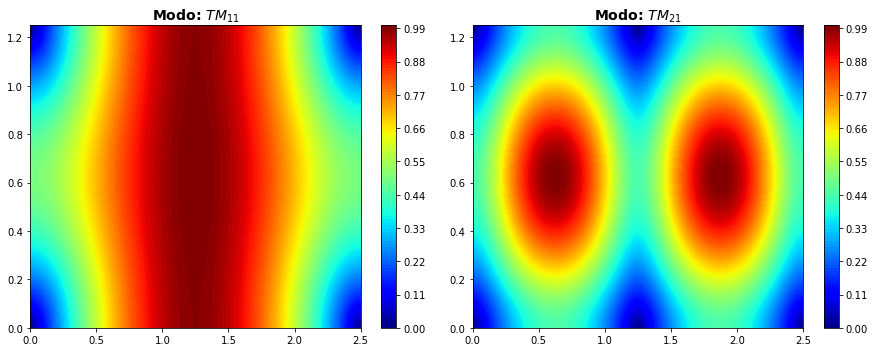

In [20]:
fig, axs = plt.subplots(1, len(prop), figsize = (6.25*len(prop), 5))
mycmap = plt.get_cmap('jet')

x = np.linspace(0, a, 100)
y = np.linspace(0, b, 100)
z = 0.1
X, Y = np.meshgrid(x, y)

for i in range(len(prop)):
    m, n = prop[i,0:2]
    fc = prop[i,2]
    
    kx = m*pi/a
    ky = n*pi/b
    kc = 2*pi*fc/c
    K = 2*pi*F/c
    β = csqrt(K**2 - kc**2)
    
    Ex = (-1j*β*kx/kc**2)*np.cos(kx*X)*np.sin(ky*Y)*np.exp(1j*β*z)
    Ey = (-1j*β*ky/kc**2)*np.sin(kx*X)*np.cos(ky*Y)*np.exp(1j*β*z)
    Ez = np.sin(kx*X)*np.sin(ky*Y)*np.exp(1j*β*z)
    
    E = np.sqrt(abs(Ex)**2 + abs(Ey)**2 + abs(Ez)**2)
    Emax = np.max(E)

    field = axs[i].contourf(X*1e2, Y*1e2, E/Emax, 100, cmap = mycmap, vmin = 0, vmax = 1)
    fig.colorbar(field, ax = axs[i])
    axs[i].set_title('Modo: $TM_{'+str(int(m))+str(int(n))+'}$', fontsize = 14, fontweight = 'bold')
    
plt.tight_layout()